<img><src>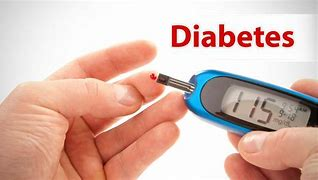</src></img>

<b>Definition of data sate: </b>Diabetes is a chronic health condition that affects how your body turns food into energy. There are three main types of diabetes: type 1, type 2, and gestational diabetes.
<hr><b>Goals: </b>we create model classifay human of health  and predict the state of human diabetes by used ML
<hr>
<h4>df1:</h4>
diabetes_binary_health_indicators_BRFSS2021.csv is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

<h4>df2:</h4>
diabetes_binary_5050split_health_indicators_BRFSS2021 is a clean dataset of 67,136 survey responses to the CDC's BRFSS2021. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

<h4>df3:</h4>
diabetes_012_health_indicators_BRFSS2021 is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.
    

<!-- # Import library -->
<h1 align=center  style=background-color:DodgerBlue> Import library</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold , cross_val_score


from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



In [2]:
df1=pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")
df2=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
df3=pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")

<!-- # PreProcessing -->
<h1 align=center  style=background-color:DodgerBlue> PreProcessing</h1>

In [3]:
# show all columns
pd.set_option('display.max_columns', None) 

In [4]:
display(df1.head(3))
display(df2.head(3))
display(df3.head(3))

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,0,0,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0


In [5]:
df1.info()
print("-"*100)
df2.info()
print("-"*100)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [6]:
print(f"dataframe is sum duplicated:-\n df1: {df1.duplicated().sum()} \n df2: {df2.duplicated().sum()} \n df3: {df3.duplicated().sum()}")

dataframe is sum duplicated:-
 df1: 13135 
 df2: 737 
 df3: 12828


In [7]:
# replace name feature 
df3['Diabetes_012'] = df3['Diabetes_012'].replace({1: 1, 2: 1, 0: 0})
df3.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [8]:
# combine 3 dataset
df = pd.concat([df1, df2, df3], ignore_index=True)

In [9]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
158503,0.0,0,1.0,1,27.0,0.0,0.0,0.0,1,0,1,0,1,0.0,2.0,1.0,1.0,0.0,0,7,6.0,7.0
325435,0.0,1,1.0,1,22.0,0.0,0.0,0.0,1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0,13,6.0,8.0
102772,0.0,0,1.0,1,29.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,8,6.0,9.0
37319,0.0,0,0.0,1,23.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,1.0,8.0,0.0,1,9,5.0,9.0
335352,0.0,1,1.0,1,34.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,1.0,0.0,0,10,6.0,10.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539892 entries, 0 to 539891
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       539892 non-null  float64
 1   HighBP                539892 non-null  int64  
 2   HighChol              539892 non-null  float64
 3   CholCheck             539892 non-null  int64  
 4   BMI                   539892 non-null  float64
 5   Smoker                539892 non-null  float64
 6   Stroke                539892 non-null  float64
 7   HeartDiseaseorAttack  539892 non-null  float64
 8   PhysActivity          539892 non-null  int64  
 9   Fruits                539892 non-null  int64  
 10  Veggies               539892 non-null  int64  
 11  HvyAlcoholConsump     539892 non-null  int64  
 12  AnyHealthcare         539892 non-null  int64  
 13  NoDocbcCost           539892 non-null  float64
 14  GenHlth               539892 non-null  float64
 15  

dataset isnot null value 


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,539892.0,0.196934,0.397682,0.0,0.0,0.0,0.0,1.0
HighBP,539892.0,0.434694,0.495717,0.0,0.0,0.0,1.0,1.0
HighChol,539892.0,0.414268,0.492596,0.0,0.0,0.0,1.0,1.0
CholCheck,539892.0,0.964949,0.183910,0.0,1.0,1.0,1.0,1.0
BMI,539892.0,29.119557,6.636712,12.0,25.0,28.0,32.0,99.0
Smoker,539892.0,0.415498,0.492808,0.0,0.0,0.0,1.0,1.0
Stroke,539892.0,0.041382,0.199173,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,539892.0,0.092776,0.290118,0.0,0.0,0.0,0.0,1.0
PhysActivity,539892.0,0.771525,0.419851,0.0,1.0,1.0,1.0,1.0
Fruits,539892.0,0.619352,0.485547,0.0,0.0,1.0,1.0,1.0


In [12]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing_value'] = df.isna().sum()
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing_value,unique,count
Diabetes_binary,float64,0,2,539892
HighBP,int64,0,2,539892
HighChol,float64,0,2,539892
CholCheck,int64,0,2,539892
BMI,float64,0,84,539892
Smoker,float64,0,2,539892
Stroke,float64,0,2,539892
HeartDiseaseorAttack,float64,0,2,539892
PhysActivity,int64,0,2,539892
Fruits,int64,0,2,539892


In [13]:
# show columns values
for col in df.columns:
    print(df[col].value_counts())

0.0    433569
1.0    106323
Name: Diabetes_binary, dtype: int64
0    305204
1    234688
Name: HighBP, dtype: int64
0.0    316232
1.0    223660
Name: HighChol, dtype: int64
1    520968
0     18924
Name: CholCheck, dtype: int64
27.0    49108
26.0    40349
24.0    38309
28.0    34642
25.0    32958
        ...  
95.0        3
91.0        3
88.0        2
89.0        2
92.0        2
Name: BMI, Length: 84, dtype: int64
0.0    315568
1.0    224324
Name: Smoker, dtype: int64
0.0    517550
1.0     22342
Name: Stroke, dtype: int64
0.0    489803
1.0     50089
Name: HeartDiseaseorAttack, dtype: int64
1    416540
0    123352
Name: PhysActivity, dtype: int64
1    334383
0    205509
Name: Fruits, dtype: int64
1    445753
0     94139
Name: Veggies, dtype: int64
0    507245
1     32647
Name: HvyAlcoholConsump, dtype: int64
1    520000
0     19892
Name: AnyHealthcare, dtype: int64
0.0    505294
1.0     34598
Name: NoDocbcCost, dtype: int64
2.0    190238
3.0    169234
1.0     90894
4.0     67642
5.0     2

In [14]:
# convert datatype to int 
df = df.astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539892 entries, 0 to 539891
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       539892 non-null  int32
 1   HighBP                539892 non-null  int32
 2   HighChol              539892 non-null  int32
 3   CholCheck             539892 non-null  int32
 4   BMI                   539892 non-null  int32
 5   Smoker                539892 non-null  int32
 6   Stroke                539892 non-null  int32
 7   HeartDiseaseorAttack  539892 non-null  int32
 8   PhysActivity          539892 non-null  int32
 9   Fruits                539892 non-null  int32
 10  Veggies               539892 non-null  int32
 11  HvyAlcoholConsump     539892 non-null  int32
 12  AnyHealthcare         539892 non-null  int32
 13  NoDocbcCost           539892 non-null  int32
 14  GenHlth               539892 non-null  int32
 15  MentHlth              539892 non-n

In [16]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [17]:
df=df.drop(["Education","Income","NoDocbcCost","Veggies","Age"],axis=1)

In [18]:
# #show feature effect on target
# sns.heatmap(data=df,annot=True)

## Data ratio

<AxesSubplot:xlabel='Diabetes_binary', ylabel='count'>

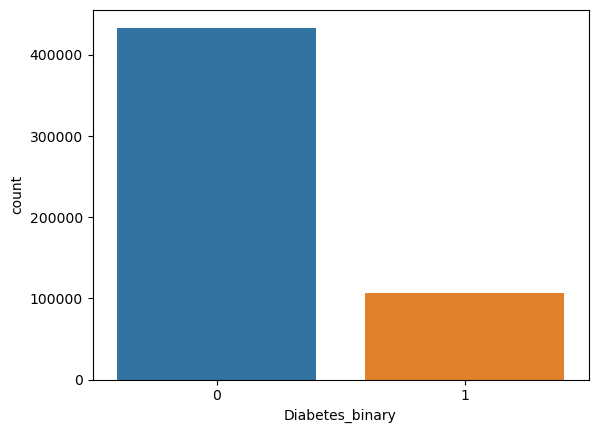

In [19]:
sns.countplot(x="Diabetes_binary",data=df)

<!-- Before marge 
Not_Diabetes: 84.6%
Diabetes: 15.3%


After Marge 
Not_Diabetes: 80%
Diabetes: 15.3% -->

In [20]:
# # unimbalance
# from imblearn.over_sampling import RandomOverSampler
# ous=RandomOverSampler(random_state=42)
# x_res,y_res=ous.fit_resample(x,y)

In [21]:
# # After and Before check imbalance data
# from collections import Counter 
# print('Original dataset shape {}'.format(Counter(y)))

# print('Resampled dataset shape {}'.format(Counter(y_res)))

<!-- # EDA -->
<h1 align=center  style=background-color:DodgerBlue> Exploratory Data Analysis</h1>

In [22]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex'],
      dtype='object')

In [62]:
# from matplotlib import pyplot as plt

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     # Show all features
#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.title('feature importances')
#     plt.show()

# # whatever your features are called
# features_names = ['PhysHlth', 'MentHlth', 'GenHlth', 'Sex', 'Age', 'AnyHealthcare', 'DiffWalk',
#        'HvyAlcoholConsump', 'Fruits', 'PhysActivity','HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',]

# f_importances(abs(dt.feature_importances_), features_names, top=15)

<!-- # Model -->
<h1 align=center  style=background-color:DodgerBlue> Modeling</h1>

In [24]:
# Split Data
x=df.iloc [:,1:]
y=df[["Diabetes_binary"]]

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
# # standerscaler
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.fit_transform(X_test)

In [27]:
# Train model
LR=LogisticRegression()
LR.fit(X_train, Y_train)

E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# # Feature selection 

# FeatureSelection= SelectFromModel(estimator=LR) # make sure that thismodel is well-defined
# FeatureSelection.fit(X_train,Y_train)
# FeatureSelection.get_support()

## KNN Model

In [29]:
# knn=KNeighborsClassifier(n_neighbors=10)
# knn.fit(X_train, Y_train)

## Decision Tree Model

In [30]:
dt=DecisionTreeClassifier(max_depth=5,max_features=7)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_features=7)

## SVC Model

In [31]:
# svc=SVC(kernel='linear',C=1)

In [32]:
# svc.fit(x,y)

In [33]:
# # feedback model(accurcy)
# print(classification_report(Y_test, y_pred_svc))

## XGBoost Model

In [34]:
!pip install xgboost

In [35]:
xgb=XGBClassifier( max_depth=4, n_estimators=6, learning_rate=0.4)

In [36]:
# # Gridsearch
# from sklearn.model_selection import GridSearchCV
# parameter={"n_estimators":np.arange(10,15),"max_depth":np.arange(1,10)}
# GS=GridSearchCV(XGBClassifier(),parameter)
# GS.fit(x,y)

In [37]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=6, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## RandomForect Model

In [38]:
# Randomforect
rf = RandomForestClassifier(n_estimators= 18 , max_depth= 5 , max_features= 7)
rf.fit(X_train,Y_train)

C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_17916\1401989010.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=5, max_features=7, n_estimators=18)

E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


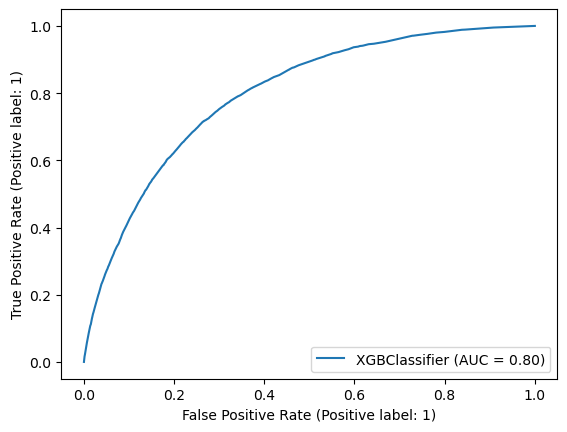

In [39]:
# AUC XGB
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb,X_test,Y_test)

# Voting

In [40]:
clf1=LogisticRegression()
clf2=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)
clf3= DecisionTreeClassifier(    max_depth= 3 , max_features= 4)
clf4=KNeighborsClassifier(n_neighbors=10)
clf5=RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [41]:
v_clf=VotingClassifier(estimators=[('LR',clf1),('xgb',clf2),('DT',clf3),('knn',clf4),('rf',clf5)],voting ="hard")

In [42]:
# v_clf.fit(X_train , Y_train)
# print (v_clf.score(X_train , Y_train))
# print (v_clf.score(X_test, Y_test))

E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Traceback (most recent call last):
  File "E:\Users\COMPUMARTS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_17916\959842630.py", line 2, in <module>
    print (v_clf.score(X_train , Y_train))
  File "E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 344, in predict
    predictions = self._predict(X)
  File "E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 60, in _predict
    return np.asarray([est.predict(X) for est in self.estimators_]).T
  File "E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 60, in <listcomp>
    return np.asarray([est.predict(X) for est in self.estima

TypeError: object of type 'NoneType' has no len()

In [43]:
# y_pred_vot=v_clf.predict(X_test)

<!-- # Report -->
<h1 align=center  style=background-color:DodgerBlue> Report </h1>

### LR

[[83461  3463]
 [16261  4794]]


<AxesSubplot:>

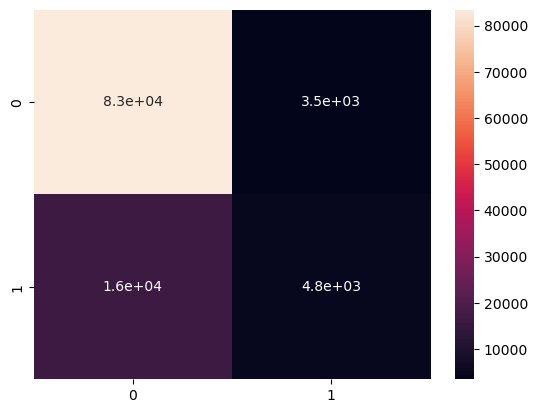

In [44]:
# Y_prediction
y_pred=LR.predict(X_test)
CM=confusion_matrix(Y_test, y_pred)
print(CM)

sns.heatmap(CM,annot=True)

In [45]:
# feedback LR model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     86924
           1       0.58      0.23      0.33     21055

    accuracy                           0.82    107979
   macro avg       0.71      0.59      0.61    107979
weighted avg       0.79      0.82      0.78    107979



### KNN

In [46]:
# y_pred_knn=knn.predict(X_test)
# print("acuuricy score: ", accuracy_score(y_pred_knn,Y_test))
# print(confusion_matrix(y_pred_knn,Y_test))

### DT

In [47]:
y_pred_dt=dt.predict(X_test)
print (classification_report(Y_test , y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     86924
           1       0.52      0.25      0.34     21055

    accuracy                           0.81    107979
   macro avg       0.68      0.60      0.61    107979
weighted avg       0.78      0.81      0.78    107979



### SVC

In [48]:
# y_pred_svc=svc.predict(X_test)
# CM=confusion_matrix(Y_test, y_pred_svc)
# print(CM)
# sns.heatmap(CM,annot=True)

### XGB

In [49]:
y_pred_xgb=xgb.predict(X_test)
print (classification_report(Y_test , y_pred_xgb))


              precision    recall  f1-score   support

           0       0.83      0.97      0.90     86924
           1       0.60      0.19      0.29     21055

    accuracy                           0.82    107979
   macro avg       0.72      0.58      0.59    107979
weighted avg       0.79      0.82      0.78    107979



### RF

In [50]:
y_pred_rf=rf.predict(X_test)
print (classification_report(Y_test , y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.98      0.90     86924
           1       0.62      0.17      0.26     21055

    accuracy                           0.82    107979
   macro avg       0.72      0.57      0.58    107979
weighted avg       0.79      0.82      0.77    107979



# Cross Validation

### LR

In [51]:
#cross validation 
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(LR ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

[0.81631717 0.81702565 0.81833842]


E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RF

In [52]:
#cross validation 
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(rf ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.8152753  0.81510165 0.81690757]


### xgb

In [53]:
#cross validation 
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(xgb ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

[0.81670614 0.81645609 0.81887325]


### DT

In [60]:
#cross validation 
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt ,X_train, Y_train, cv = K_fold , scoring= scoring)
print (score)

[0.80901015 0.81096193 0.81402505]


<hr>

<!-- # Evaluation -->
<h1 align=center  style=background-color:DodgerBlue> Evaluation</h1>

In [55]:
evaluation=pd.DataFrame({
    "Model":['LR',"RF","XGB","DT",],"Accurcy":[accuracy_score(Y_test, y_pred),accuracy_score(Y_test , y_pred_rf),accuracy_score(Y_test , y_pred_xgb),accuracy_score(Y_test , y_pred_dt)]
})
evaluation

,Model,Accurcy
0,LR,0.817335
1,RF,0.817279
2,XGB,0.817891
3,DT,0.809370


<hr>

<!-- # Test -->
<h1 align=center  style=background-color:DodgerBlue> Test</h1>

In [56]:
display(x.head(10))
print("************************************************************************")
display(y.head(10))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
0,0,1,1,15,1,0,0,0,1,0,1,5,10,20,0,0
1,1,0,1,28,0,0,1,0,1,0,1,2,0,0,0,0
2,1,1,1,33,0,0,0,1,1,0,1,2,10,0,0,0
3,0,1,1,29,0,1,1,1,1,0,1,5,0,30,1,1
4,0,0,1,24,1,0,0,0,0,0,1,3,0,0,1,1
5,1,0,1,40,1,0,0,1,1,0,1,3,5,25,1,0
6,1,1,1,27,1,0,0,0,0,0,1,4,25,0,0,0
7,0,0,1,24,0,0,1,0,0,0,1,4,0,0,0,1
8,1,1,1,30,0,0,0,0,1,0,1,2,0,0,0,0
9,1,1,1,36,1,0,0,0,0,0,1,4,0,0,0,1


************************************************************************


,Diabetes_binary
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [61]:
human_1 = [0,1,1,15,1,0,0,0,1,0,1,5,10,20,0,0] # 0
print (dt.predict([human_1]))


human_2 = [0,0,1,24,1,0,0,0,0,0,1,3,0,0,1,1] # 4
print (dt.predict([human_2]))

human_3 = [0,1,1,29,0,1,1,1,1,0,1,5,0,30,1,1] # 3
print (dt.predict([human_3]))


[0]
[0]
[0]


E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\Users\COMPUMARTS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
